In [1]:
using LinearAlgebra
using Plots
using Pkg 

El Hamiltoniano que se nos plantea en el caso para $N = 3$ qubits es

$H = A_1 \cos(\theta) + A_2 \sin(\theta)$

donde $A_1$ y $A_2$ son operadores aleatorios, en el paper se realizó lo siguiente 

- Choose different eigenstates $\ket{\varphi_n}$ and plot their expectations on $A_1$ and $A_2$ 
- Plot the energy of $H$ with respect to the eigenstates $\ket{\varphi_n}$ as a function of $\theta$, for $n=0,...,7$

La idea es que los operadores $A_i$ sean generados de la siguiente forma 

#### $ A_1 = \left( \sum_{i,j \epsilon \{x,y,z\}} x_{i,j} \hspace{0.1cm}\sigma_i \otimes \sigma_j \otimes \mathbb{I} \right)$  

y


#### $ A_2 = \left( \sum_{i,j \epsilon \{x,y,z\}} x_{i,j} \hspace{0.1cm} \mathbb{I} \otimes \sigma_i \otimes \sigma_j \right)$  

donde $x_{ij}$ son una distribución aleatoria uniforme entre $[-1,1]$

existen $\frac{n!}{(n-k)!}$ combinaciones donde $n$ son las opciones totales (3) y $k$ son las opciones que tomamos $(2)$ 






Generar términos que actúen en 1 sólo elemento

Revisar que el Hamiltoniano no sea simétrico bajo paridad 

¿Cómo generar GOE Y GUE? 

Experimentar para obtener distintos Hamiltonianos bajo distintas condiciones

In [2]:
N = 3 # number of qubits
d = 2^N # dimension of the Hilbert space
#A1 = rand(d,d) #+ im*randn(d,d)
#A2 = rand(d,d) #+ im*randn(d,d)

sigmax = [0 1; 1 0]
sigmay = [0 -im; im 0]
sigmaz = [1 0; 0 -1]
id= I(2)


Sigmas = Dict(1 => sigmax, 2 => sigmay, 3 => sigmaz) #Diccionario para llamar a las matrices de Pauli

cd = rand(3,3)*2 .-1
df = rand(3,3)*2 .-1
function Alocal(Particles,cd)
    k = Particles-1 # Un operador k-local es aquel que actúa sobre k partículas, en este caso hay N partículas y se aplican a N-1 
    A = zeros(2^k,2^k)
    for i in 1:3
        for j in 1:3 
            A = A + cd[i,j]*kron(Sigmas[i],Sigmas[j])
        end
    end
    return A
end
sigmax

2×2 Matrix{Int64}:
 0  1
 1  0

In [3]:
Alocal(3,cd)
Alocal(3,df)

4×4 Matrix{ComplexF64}:
  0.692166+0.0im         0.35527+0.579954im  …  0.541669+0.930236im
   0.35527-0.579954im  -0.692166+0.0im          0.677648+0.201196im
 -0.677648+0.201196im  -0.391852+0.292671im     -0.35527-0.579954im
  0.541669-0.930236im   0.677648-0.201196im     0.692166+0.0im

In [4]:
function AlocalGeneral(Particles)
    m = Particles-3 # m es el número extra de veces que quiero aplicar la función Kron
    C = randn(1,2^Particles*2^Particles)
    n = 3 # son 9 elementos, 3*3 = 9, |opciones|^valoresdisp = 3^2
    cd = reshape(C[1:(n*n)],n,n) 
    Alocal(3, cd)


    k = n*n +1 # El primer elemento que se debe tomar para el for que quiero realizar 

end
function MatrizAleat(N)
    # N es el número de iteraciones total, i es el número de iteración actual
    B = Sigmas[1]
    Am = c[1,N]*B
    return Am 
end

MatrizAleat (generic function with 1 method)

In [5]:
ad = randn(1,2^5*2^5)
n = 2^2
c = reshape(ad[1:(n*n)], n, n)

4×4 Matrix{Float64}:
  0.57441   1.45922   0.136183    -0.31325
 -1.30162   0.150735  0.414143    -0.4659
 -0.365708  0.478219  0.00063561   1.02
 -0.881902  0.518083  0.159477    -0.726799

In [6]:
# N = 5
# c = randn(1,N)
function MatrizAleat(N)
    # N es el número de iteraciones total, i es el número de iteración actual
    B = Sigmas[1]
    Am = c[1,N]*B
    return Am 
end
#MatrizAleat(1, 3)


MatrizAleat (generic function with 1 method)

In [ ]:
#x = 0.5
#H = A1.*cos(c1[1]) + A2.*sin(c2[1])	
#eigvec = eigen(H).vectors
#eigenvecadj = adjoint(eigvec) # Matriz adjunta de eigenvectores Duda: ¿los vectores bras de este Hamiltoniano son los vectores adjuntos? 
function expectationvalue(eigvec,eigenvecadj)
    expvalueA1 = zeros(ComplexF64, d,d)
    expvalueA2 = zeros(ComplexF64, d,d)
    for i in 1:d 
        vecadji = transpose(eigenvecadj[i,:])
        for j in 1:d
            veci = eigvec[:,i]
            expvalueA1[i,j] = vecadji*A1*veci
            expvalueA2[i,j] = vecadji*A2*veci
        end
    end
    return expvalueA1, expvalueA2
end

UndefVarError: UndefVarError: `A1` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [9]:
A1 = kron(I(2),Alocal(3,cd))
A2 = kron(Alocal(3,df),I(2))

8×8 Matrix{ComplexF64}:
  0.692166+0.0im             0.0+0.0im       …       0.0+0.0im
       0.0+0.0im        0.692166+0.0im          0.541669+0.930236im
   0.35527-0.579954im        0.0+0.0im               0.0+0.0im
       0.0+0.0im         0.35527-0.579954im     0.677648+0.201196im
 -0.677648+0.201196im        0.0+0.0im               0.0+0.0im
       0.0+0.0im       -0.677648+0.201196im  …  -0.35527-0.579954im
  0.541669-0.930236im        0.0+0.0im               0.0+0.0im
       0.0+0.0im        0.541669-0.930236im     0.692166+0.0im

In [10]:
A1

8×8 Matrix{ComplexF64}:
 -0.512395+0.0im        0.0536435-0.40443im   …         0.0+0.0im
 0.0536435+0.40443im     0.512395+0.0im                 0.0+0.0im
 0.0273602+0.731066im     1.02987-1.12129im             0.0+0.0im
  0.786656+0.686728im  -0.0273602-0.731066im            0.0+0.0im
       0.0+0.0im              0.0+0.0im            0.786656-0.686728im
       0.0+0.0im              0.0+0.0im       …  -0.0273602+0.731066im
       0.0+0.0im              0.0+0.0im          -0.0536435+0.40443im
       0.0+0.0im              0.0+0.0im           -0.512395+0.0im

In [11]:
H = A1+ A2
eigen(H)
H2 = rand(5,5)
eigen(H2)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
5-element Vector{ComplexF64}:
  -0.5179224662766514 + 0.0im
 -0.05295834459694956 - 0.21045593102367252im
 -0.05295834459694956 + 0.21045593102367252im
   0.4799463361314683 + 0.0im
    2.615273864793021 + 0.0im
vectors:
5×5 Matrix{ComplexF64}:
   0.502728+0.0im   0.197851-0.389707im   …  -0.535363+0.0im  -0.554759+0.0im
 -0.0625436+0.0im  -0.272491+0.0105218im       -0.3538+0.0im  -0.413932+0.0im
   0.243655+0.0im  -0.705883-0.0im            0.750867+0.0im   -0.39649+0.0im
   0.332146+0.0im   0.337709+0.239041im      0.0157802+0.0im  -0.307485+0.0im
  -0.757406+0.0im   0.242239-0.0805185im     -0.155441+0.0im  -0.518798+0.0im

In [12]:
function a1vsa2(xin,step,xfin, n) #n = 1 es el estado fundamental y n = 2 es el primer estado excitado, etc
    x = xin:step:xfin
    a1 = zeros(ComplexF64,length(x))
    a2 = zeros(ComplexF64,length(x))
    for i in 1:length(x)
        H = A1.*cos(x[i]) + A2.*sin(x[i])
        eigvec = eigen(H).vectors
        eigenvecadj = adjoint(eigvec) 
        rho = kron(eigvec[n,:],transpose(eigenvecadj[:,n])) # Matriz de densidad para el estado fundamental
        a1[i] = tr(rho*A1)
        a2[i] = tr(rho*A2)
    end
    return a1,a2
end

a1vsa2 (generic function with 1 method)

In [13]:
aa = a1vsa2(0,0.001,6,1)
bb = a1vsa2(0,0.001,6,2)
gg = a1vsa2(0,0.001,6,3)
#plot(imag(alpha[1]),imag(alpha[2]))

(ComplexF64[0.2704131474502574 + 0.0im, -0.5176318036858466 + 2.7755575615628914e-17im, -0.02553062445307719 - 2.7755575615628914e-17im, 0.06580940241767022 + 0.0im, -0.34631081005674724 + 0.0im, -0.5513370083990965 + 0.0im, 0.3104287470978605 + 2.7755575615628914e-17im, -0.3100232194236744 + 2.7755575615628914e-17im, -0.9150466049980021 - 6.938893903907228e-18im, -0.0055004011734413535 + 2.7755575615628914e-17im  …  -0.5534215484979543 + 0.0im, -0.6866049925710309 + 0.0im, -0.28934107378709184 - 2.7755575615628914e-17im, -0.41184357969809493 + 5.898059818321144e-17im, -0.32041488294429404 - 5.551115123125783e-17im, -0.46042208077501134 + 5.551115123125783e-17im, 0.29607518803169874 + 6.938893903907228e-18im, 0.2308067343045421 - 1.3877787807814457e-17im, 0.17156416857991857 + 3.8163916471489756e-17im, 0.1303900913265818 + 4.163336342344337e-17im], ComplexF64[-0.3587957878422888 + 2.7755575615628914e-17im, 0.0974224278197631 + 6.488950002325744e-17im, 0.025404917360730472 + 2.721347452

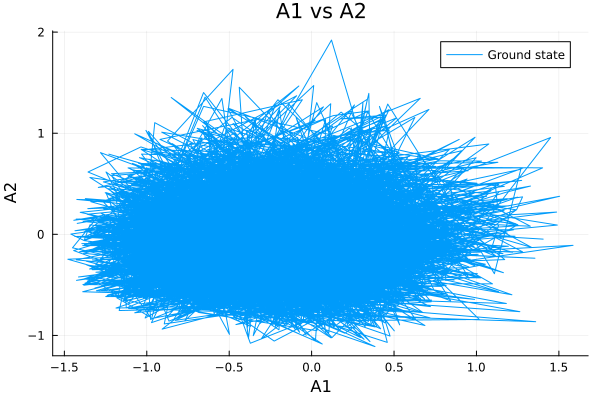

In [14]:
plot(real(aa[1]),real(aa[2]),xlabel = "A1", ylabel = "A2", label = "Ground state", title = "A1 vs A2")
#plot!(real(bb[1]),real(bb[2]),xlabel = "A1", ylabel = "A2", label = "First excited state", title = "A1 vs A2")
#plot!(real(gg[1]),real(gg[2]),xlabel = "A1", ylabel = "A2", label = "First excited state", title = "A1 vs A2")

In [15]:
function energyvsparameter(xmin,step,xmax)
    x = xmin:step:xmax
    d= 2^3
    energy = zeros(ComplexF64,d,length(x))
    for i in 1:length(x)
        H = A1.*cos(x[i]) + A2.*sin(x[i])
        energy[:,i] = eigen(H).values
    end
    return energy
end
A1

8×8 Matrix{ComplexF64}:
 -0.512395+0.0im        0.0536435-0.40443im   …         0.0+0.0im
 0.0536435+0.40443im     0.512395+0.0im                 0.0+0.0im
 0.0273602+0.731066im     1.02987-1.12129im             0.0+0.0im
  0.786656+0.686728im  -0.0273602-0.731066im            0.0+0.0im
       0.0+0.0im              0.0+0.0im            0.786656-0.686728im
       0.0+0.0im              0.0+0.0im       …  -0.0273602+0.731066im
       0.0+0.0im              0.0+0.0im          -0.0536435+0.40443im
       0.0+0.0im              0.0+0.0im           -0.512395+0.0im

In [16]:
H = A1.*cos(0.1) + A2.*sin(0.1)
#eigen(H)
H
eigen(H)

Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
8-element Vector{Float64}:
 -1.879059764935859
 -1.8790597649358585
 -0.7985249188440542
 -0.7985249188440542
  0.13479812385258727
  0.1347981238525895
  2.542786559927313
  2.542786559927319
vectors:
8×8 Matrix{ComplexF64}:
    0.104931-0.560202im    …   0.0619415+0.309236im
    0.145251+0.340711im        -0.619036-0.192679im
    -0.36243+0.00992735im      -0.558254+0.245315im
   -0.582456+0.256023im       -0.0613476+0.313333im
  -0.0261734-0.00827035im     0.00939371-0.032193im
 -0.00242929+0.00518756im  …   0.0415912+0.0286185im
   0.0246793+0.0181234im       0.0504017+0.0149424im
         0.0+0.0im                   0.0+0.0im

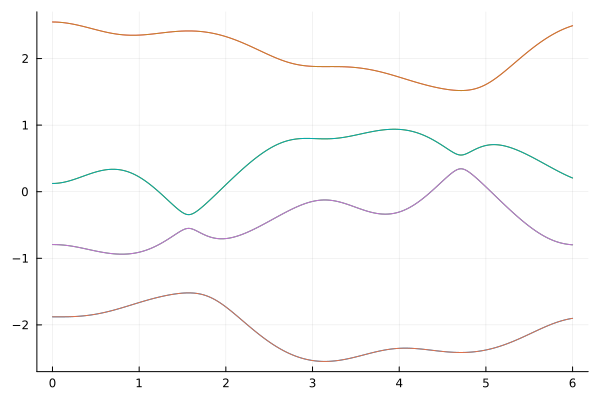

In [17]:
b = real(energyvsparameter(0,0.01,6))
x = 0:0.01:6
plot(x,b', label = false)

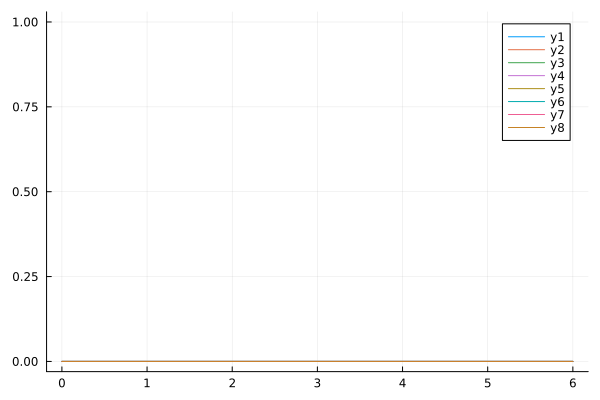

In [18]:
a = imag(energyvsparameter(0,0.01,6))
x = 0:0.01:6
plot(x,a')

In [39]:
function energyvsparameter2(xmin,step,xmax)
    x = xmin:step:xmax
    d= 2^3
    energy = zeros(ComplexF64,d,length(x))
    for i in 1:length(x)
        H = B1.*cos(x[i]) + B2.*sin(x[i])
        energy[:,i] = eigen(H).values
    end
    return energy
end

B1 = kron(Sigmas[1],Alocal(3,cd))
B2 = kron(Alocal(3,df),Sigmas[2])

8×8 Matrix{ComplexF64}:
       0.0+0.0im             0.0-0.692166im  …   0.930236-0.541669im
       0.0+0.692166im        0.0+0.0im                0.0+0.0im
       0.0+0.0im       -0.579954-0.35527im       0.201196-0.677648im
  0.579954+0.35527im         0.0+0.0im                0.0+0.0im
      -0.0+0.0im        0.201196+0.677648im     -0.579954+0.35527im
 -0.201196-0.677648im       -0.0+0.0im       …        0.0-0.0im
       0.0+0.0im       -0.930236-0.541669im           0.0-0.692166im
  0.930236+0.541669im        0.0+0.0im                0.0+0.0im

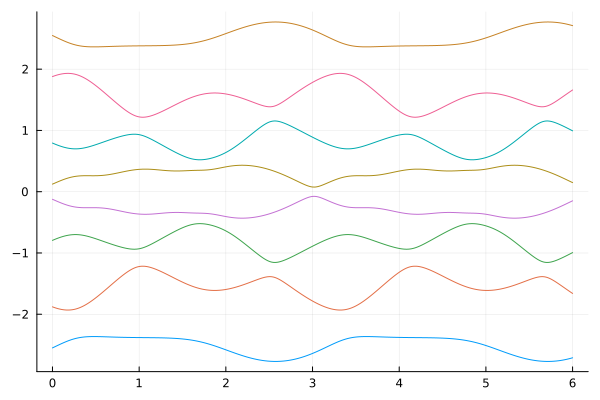

In [40]:
b2 = real(energyvsparameter2(0,0.01,6))
x = 0:0.01:6
plot(x,b2', label = false)

Aparentemente el Hamiltoniano es Hermítico

In [27]:
N = 3 # Qubits
d = 2^N
Arand1 =   rand(d,d)
Arand2 =    rand(d,d)


8×8 Matrix{Float64}:
 0.116902   0.810784   0.474876  0.969675  …  0.802349  0.0643066  0.920641
 0.700373   0.287662   0.878946  0.995224     0.688264  0.620657   0.807224
 0.479177   0.317265   0.557653  0.82455      0.368331  0.18437    0.708038
 0.271674   0.632403   0.879016  0.635378     0.877572  0.121654   0.404261
 0.158073   0.0759422  0.136806  0.455908     0.477068  0.678233   0.811217
 0.864092   0.751756   0.434508  0.196634  …  0.655405  0.0887904  0.659829
 0.0455597  0.25468    0.213558  0.496022     0.686988  0.96599    0.863246
 0.854219   0.485138   0.514429  0.218161     0.118188  0.699203   0.911468

In [28]:
a = 0 # Valor inicial Parámetro θ
b = 6 # Valor final Parámetro θ
x = range(a, stop = b, step = 0.001)
Vals = zeros(ComplexF64,2^N, length(x))
for i in 1:length(x)
    Hrand = Arand1.*cos(x[i]) + Arand2.*sin(x[i])
    Vals[:,i] = eigen(Hrand).values
end
Vals 

8×6001 Matrix{ComplexF64}:
 -0.830518+0.0im       -0.830818+0.0im       …  -0.715254-0.114256im
 -0.590534+0.0im       -0.590273+0.0im          -0.715254+0.114256im
 0.0518732-0.284714im   0.052776-0.284453im     -0.120249-0.345713im
 0.0518732+0.284714im   0.052776+0.284453im     -0.120249+0.345713im
   0.31315+0.0im        0.312129+0.0im            0.52768-0.0751682im
  0.525815+0.0im        0.525673+0.0im       …    0.52768+0.0751682im
   1.07352+0.0im         1.07325+0.0im            1.07002+0.0im
   3.69195+0.0im         3.69595+0.0im            2.44838+0.0im

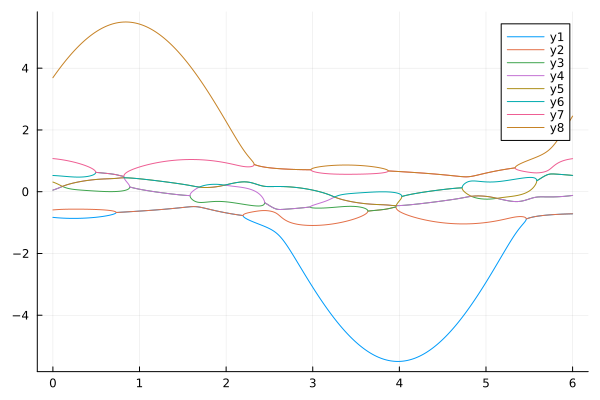

In [29]:
plot(x,real(Vals'))